In [1]:
import os
import pyarrow.parquet as pq
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = r"D:\github\oa_test_gpu\wiki_queries"

In [2]:
# parquet_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".parquet")]
# parquet_files

In [3]:
# dfs = [pq.read_table(f).to_pandas() for f in parquet_files]
# concatenated_df = pd.concat(dfs)
# concatenated_df.to_parquet(os.path.join(folder_path, "wiki_queries_950k.parquet"))

In [4]:
concatenated_df = pd.read_parquet(os.path.join(folder_path, "wiki_queries_950k.parquet"))
concatenated_df

,id,url,text,title,word_num,queries
1000000,5106811,https://en.wikipedia.org/wiki/Shahtaj%20Qizilbash,Shahtaj Qizilbash was a women's right advocat...,Shahtaj Qizilbash,139,"[who was shahtaj qizilbash, who is shahtaj qiz..."
1000001,5106829,https://en.wikipedia.org/wiki/Aurat%20Foundation,"Aurat Foundation, founded in 1986, is a women'...",Aurat Foundation,86,"[where is aurat?, aurat foundation, what is au..."
1000002,5106839,https://en.wikipedia.org/wiki/BloomingOUT,bloomingOUT is an LGBT+ radio show broadcast o...,BloomingOUT,153,"[where is blooming out, blooming out indiana, ..."
1000003,5106855,https://en.wikipedia.org/wiki/The%20Moment%20o...,The Moment of the Magician is a fantasy novel...,The Moment of the Magician,49,"[moment of the magician book, who wrote moment..."
1000004,5106875,https://en.wikipedia.org/wiki/Daily%20Emerald,"The Daily Emerald is the independent, student-...",Daily Emerald,52,"[where is the emerald newspaper in oregon, wha..."
...,...,...,...,...,...,...
89995,156641,https://en.wikipedia.org/wiki/Stalag%2017,Stalag 17 is a 1953 American drama war film wh...,Stalag 17,157,"[when was stalag 17 movie filmed, who was the ..."
89996,156644,https://en.wikipedia.org/wiki/Die%20Another%20Day,Die Another Day is a 2002 spy film and the twe...,Die Another Day,211,"[who acted in die another day movie, what movi..."
89997,156653,https://en.wikipedia.org/wiki/District,A district is a type of administrative divisio...,District,43,[what is the difference between district and c...
89998,156656,https://en.wikipedia.org/wiki/Oath%20of%20Alle...,The Irish Oath of Allegiance was a controvers...,Oath of Allegiance (Ireland),90,"[who swore the irish oath of allegiance?, when..."


In [5]:
# flatten the queries
query_list, id_list, url_list, text_list, title_list, word_num_list = [], [], [], [], [], []
for i, row in tqdm.tqdm(concatenated_df.iterrows(), total=len(concatenated_df)):
    for query in row["queries"]:
        id_list.append(row["id"])
        url_list.append(row["url"])
        text_list.append(row["text"])
        title_list.append(row["title"])
        word_num_list.append(row["word_num"])
        query_list.append(query)
query_df = pd.DataFrame(
    {
        "id": id_list,
        "url": url_list,
        "text": text_list,
        "title": title_list,
        "word_num": word_num_list,
        "query": query_list,
    }
)
query_df

100%|██████████| 950000/950000 [01:16<00:00, 12381.89it/s]


,id,url,text,title,word_num,query
0,5106811,https://en.wikipedia.org/wiki/Shahtaj%20Qizilbash,Shahtaj Qizilbash was a women's right advocat...,Shahtaj Qizilbash,139,who was shahtaj qizilbash
1,5106811,https://en.wikipedia.org/wiki/Shahtaj%20Qizilbash,Shahtaj Qizilbash was a women's right advocat...,Shahtaj Qizilbash,139,who is shahtaj qizilbash?
2,5106811,https://en.wikipedia.org/wiki/Shahtaj%20Qizilbash,Shahtaj Qizilbash was a women's right advocat...,Shahtaj Qizilbash,139,who is shahtaj qizilbash
3,5106829,https://en.wikipedia.org/wiki/Aurat%20Foundation,"Aurat Foundation, founded in 1986, is a women'...",Aurat Foundation,86,where is aurat?
4,5106829,https://en.wikipedia.org/wiki/Aurat%20Foundation,"Aurat Foundation, founded in 1986, is a women'...",Aurat Foundation,86,aurat foundation
...,...,...,...,...,...,...
2849995,156656,https://en.wikipedia.org/wiki/Oath%20of%20Alle...,The Irish Oath of Allegiance was a controvers...,Oath of Allegiance (Ireland),90,when did the irish oath of allegiance take place
2849996,156656,https://en.wikipedia.org/wiki/Oath%20of%20Alle...,The Irish Oath of Allegiance was a controvers...,Oath of Allegiance (Ireland),90,what was the irish oath of allegiance
2849997,156658,https://en.wikipedia.org/wiki/Wiktionary,"Wiktionary is a multilingual, web-based projec...",Wiktionary,167,where is wikikidnary
2849998,156658,https://en.wikipedia.org/wiki/Wiktionary,"Wiktionary is a multilingual, web-based projec...",Wiktionary,167,definition of wikipedia


In [6]:
query_df = query_df.drop_duplicates()


def get_parent_tag(query):
    question_tag = ["who", "when", "what", "which", "where", "how", "why"]
    for tag in question_tag:
        if tag in query:
            return tag
    if "is" == query[:2] or "are" == query[:3] or "was" == query[:3] or "were" == query[:4]:
        return "is/are/was/were"
    if "define" in query or "definition" in query:
        return "define"
    return "Unknown"


query_df["parent"] = query_df["query"].apply(get_parent_tag)
query_df

C:\Users\MW\AppData\Local\Temp\ipykernel_33600\2992388678.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  query_df['parent'] = query_df['query'].apply(get_parent_tag)


,id,url,text,title,word_num,query,parent
0,5106811,https://en.wikipedia.org/wiki/Shahtaj%20Qizilbash,Shahtaj Qizilbash was a women's right advocat...,Shahtaj Qizilbash,139,who was shahtaj qizilbash,who
1,5106811,https://en.wikipedia.org/wiki/Shahtaj%20Qizilbash,Shahtaj Qizilbash was a women's right advocat...,Shahtaj Qizilbash,139,who is shahtaj qizilbash?,who
2,5106811,https://en.wikipedia.org/wiki/Shahtaj%20Qizilbash,Shahtaj Qizilbash was a women's right advocat...,Shahtaj Qizilbash,139,who is shahtaj qizilbash,who
3,5106829,https://en.wikipedia.org/wiki/Aurat%20Foundation,"Aurat Foundation, founded in 1986, is a women'...",Aurat Foundation,86,where is aurat?,where
4,5106829,https://en.wikipedia.org/wiki/Aurat%20Foundation,"Aurat Foundation, founded in 1986, is a women'...",Aurat Foundation,86,aurat foundation,Unknown
...,...,...,...,...,...,...,...
2849995,156656,https://en.wikipedia.org/wiki/Oath%20of%20Alle...,The Irish Oath of Allegiance was a controvers...,Oath of Allegiance (Ireland),90,when did the irish oath of allegiance take place,when
2849996,156656,https://en.wikipedia.org/wiki/Oath%20of%20Alle...,The Irish Oath of Allegiance was a controvers...,Oath of Allegiance (Ireland),90,what was the irish oath of allegiance,what
2849997,156658,https://en.wikipedia.org/wiki/Wiktionary,"Wiktionary is a multilingual, web-based projec...",Wiktionary,167,where is wikikidnary,where
2849998,156658,https://en.wikipedia.org/wiki/Wiktionary,"Wiktionary is a multilingual, web-based projec...",Wiktionary,167,definition of wikipedia,define


([<matplotlib.patches.Wedge at 0x2038f10add0>,
 [Text(0.6639542683200764, 0.8770203701052515, 'what'),
  Text(-1.0210867085051922, 0.4091233722412259, 'who'),
  Text(-0.30258321384542464, -1.057564843732513, 'where'),
  Text(0.7146903846452939, -0.8361923547220234, 'when'),
  Text(0.939944335886077, -0.5714058500187776, 'Unknown'),
  Text(1.0180705476485639, -0.41657215462696645, 'which'),
  Text(1.0629847816910225, -0.2829546852294363, 'define'),
  Text(1.0867731997921213, -0.170070609493805, 'how'),
  Text(1.0972074519613497, -0.07833139447553998, 'why'),
  Text(1.0998588401189247, -0.017621912843214328, 'is/are/was/were')],
 [Text(0.36215687362913257, 0.47837474733013713, '777952'),
  Text(-0.5569563864573776, 0.22315820304066866, '771311'),
  Text(-0.16504538937023158, -0.5768535511268251, '639276'),
  Text(0.389831118897433, -0.4561049207574672, '191862'),
  Text(0.5126969104833147, -0.31167591819206053, '75688'),
  Text(0.5553112078083076, -0.22722117525107258, '57365'),
  Text(0

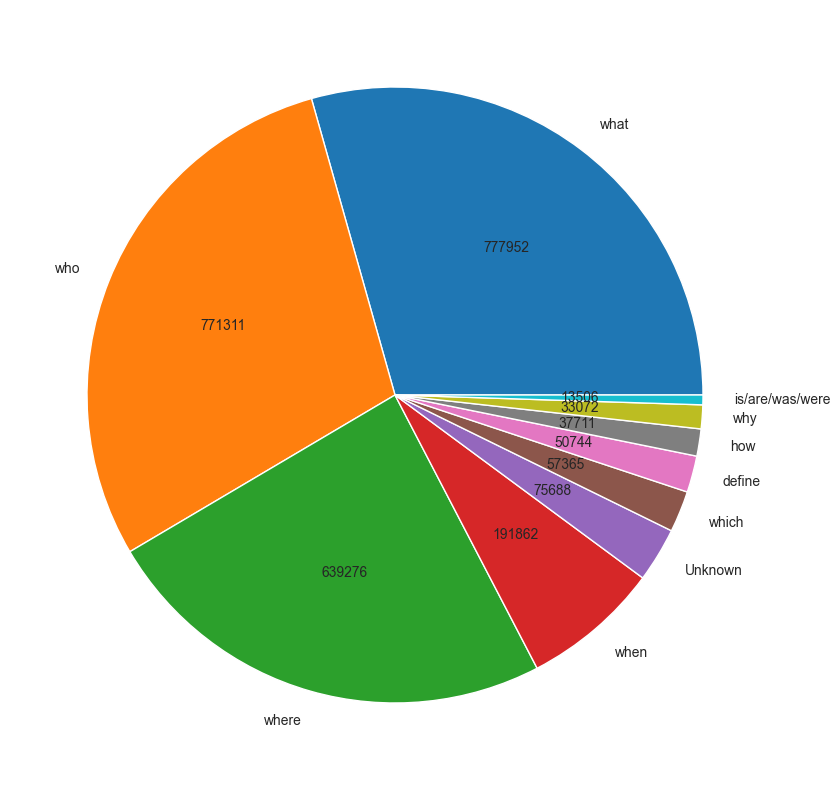

In [7]:
# create pie chart for query_df
# text should be like 28.8% (n=1234)
plt.figure(figsize=(10, 10))
values = query_df["parent"].value_counts()
plt.pie(
    values, labels=query_df["parent"].value_counts().index, autopct=lambda x: "{:.0f}".format(x * values.sum() / 100)
)

In [8]:
query_df[(query_df["parent"] == "Unknown")]
# query_df[(query_df['parent'] == 'Unknown') & (query_df['query'].str.contains('define'))]

,id,url,text,title,word_num,query,parent
4,5106829,https://en.wikipedia.org/wiki/Aurat%20Foundation,"Aurat Foundation, founded in 1986, is a women'...",Aurat Foundation,86,aurat foundation,Unknown
7,5106839,https://en.wikipedia.org/wiki/BloomingOUT,bloomingOUT is an LGBT+ radio show broadcast o...,BloomingOUT,153,blooming out indiana,Unknown
9,5106855,https://en.wikipedia.org/wiki/The%20Moment%20o...,The Moment of the Magician is a fantasy novel...,The Moment of the Magician,49,moment of the magician book,Unknown
124,5107172,https://en.wikipedia.org/wiki/Aubin%20Codex,The Aubin Codex is an 81-leaf Aztec codex writ...,Aubin Codex,48,the aubin codex,Unknown
169,5107366,https://en.wikipedia.org/wiki/Speed%20Demon%20...,Speed Demon is a 2003 Canadian-American horror...,Speed Demon (2003 film),23,id speed demon movie cast,Unknown
...,...,...,...,...,...,...,...
2849905,156587,https://en.wikipedia.org/wiki/Death%20Eater,The Death Eaters are characters featured in th...,Death Eater,204,harry potter death eaters names,Unknown
2849928,156598,https://en.wikipedia.org/wiki/Great%20Northern,Great Northern may refer to:,Great Northern,5,great northern slang meaning,Unknown
2849967,156628,https://en.wikipedia.org/wiki/The%20Bad%20and%...,The Bad and the Beautiful is a 1952 American m...,The Bad and the Beautiful,270,the song for the bad and the beautiful theme o...,Unknown
2849968,156628,https://en.wikipedia.org/wiki/The%20Bad%20and%...,The Bad and the Beautiful is a 1952 American m...,The Bad and the Beautiful,270,cast of the bad and beautiful,Unknown


In [56]:
parent_tags = query_df["parent"].unique()
sampled_df_list = []
for parent_tag in parent_tags:
    df = query_df[query_df["parent"] == parent_tag]
    # randomly get 100 rows with seed
    df = df.sample(n=1000, random_state=1)
    sampled_df_list.append(df)
sampled_df = pd.concat(sampled_df_list)
sampled_df

,id,url,text,title,word_num,query,parent
2430719,2300253,https://en.wikipedia.org/wiki/Passenger%20to%2...,Passenger to Frankfurt: An Extravaganza is a s...,Passenger to Frankfurt,272,who wrote passenger to frankfurt,who
1009479,744577,https://en.wikipedia.org/wiki/Indoor%20Footbal...,The Indoor Football League began in 1999 as a...,Indoor Football League (1999–2000),209,who owns the ifl,who
1848132,50950148,https://en.wikipedia.org/wiki/Katie%20Umback,Katie-Marie Umback is an Australian para-eque...,Katie Umback,18,who is the para equestrian,who
176027,262411,https://en.wikipedia.org/wiki/Anton%20Alberts%...,Anton Alberts was a Dutch architect best kno...,Anton Alberts (architect),185,who is architect alexander alberts,who
289371,354408,https://en.wikipedia.org/wiki/Arshile%20Gorky,Arshile Gorky was an Armenian-American painte...,Arshile Gorky,87,who is gorky,who
...,...,...,...,...,...,...,...
2582496,2582061,https://en.wikipedia.org/wiki/A.%20M.%20Naik,Anil Manibhai Naik is an Indian industrialist...,A. M. Naik,82,is anil manibhai naik an india,is/are/was/were
2338613,2194726,https://en.wikipedia.org/wiki/Jesse%20E.%20James,"Jesse Edwards ""Tim"" James was the only surviv...",Jesse E. James,48,was jesse james born in tennessee,is/are/was/were
1904500,51160949,https://en.wikipedia.org/wiki/Amanda%20Benoit-...,Amanda Benoit-Wark is a Canadian ice hockey p...,Amanda Benoit-Wark,41,is amanda benoit ark hockey player,is/are/was/were
2328121,2177821,https://en.wikipedia.org/wiki/Will%20to%20Powe...,Will to Power is an American dance-pop group t...,Will to Power (band),117,is will to power in the united states music,is/are/was/were


In [57]:
sampled_df.to_csv("wiki_qa_bart_10000row_input.csv", index=False)

In [10]:
# plt.figure(figsize=(10,10))
# values = sampled_df['parent'].value_counts()
# plt.pie(values, labels=sampled_df['parent'].value_counts().index,
#         autopct= lambda x: '{:.0f}'.format(x*values.sum()/100)
#         )

In [50]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [51]:
from transformers import pipeline
import tiktoken


def num_tokens_from_string(string: str) -> int:
    encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
    num_tokens = len(encoding.encode(string))
    return num_tokens


row = sampled_df.iloc[0]
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [52]:
# one sample test
print(row["query"])
num_tokens = num_tokens_from_string(row["text"])
print(f"text (token: {num_tokens})")
print(row["text"])
print("output")
print(summarizer(row["text"], max_length=num_tokens, min_length=40, do_sample=False))

Your max_length is set to 353, but you input_length is only 346. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=173)


who wrote passenger to frankfurt
text (token: 353)
Passenger to Frankfurt: An Extravaganza is a spy novel by Agatha Christie first published in the United Kingdom by the Collins Crime Club in September 1970 and in the United States by Dodd, Mead and Company later in the same year. The UK edition retailed at twenty-five shillings. In preparation for decimalisation on 15 February 1971, it was concurrently priced on the dustjacket at £1.25. The US edition retailed at $5.95.
It was published to mark Christie's eightieth birthday and, by counting up both UK and US short-story collections to reach the desired total, was also advertised as her eightieth book. It is the last of her spy novels. At the beginning of the book there is a quote by Jan Smuts, "Leadership, besides being a great creative force, can be diabolical ..."
Sir Stafford Nye, a middle-aged diplomat, steps into the world of spies, double agents, and secret groups to effect a change in international power centres. He meets a wom

In [27]:
response = summarizer(row["text"], max_length=int(num_tokens * 0.7), min_length=40, do_sample=False)[0]["summary_text"]
response

"The Passenger to Frankfurt: An Extravaganza is a spy novel by Agatha Christie. It was published to mark Christie's eightieth birthday and was advertised as her eightieth book. It is one of only four of her novels not to have received an adaptation."

In [58]:
# multi sample output
sampled_output_df = pd.read_csv("wiki_qa_bart_10000row.csv")
sampled_output_df
# for index, row in sampled_output_df[:50].iterrows():
#     print(index)
#     print(row['query'])
#     print(row['response'])

,id,url,text,title,word_num,query,parent,response
0,2300253,https://en.wikipedia.org/wiki/Passenger%20to%2...,Passenger to Frankfurt: An Extravaganza is a s...,Passenger to Frankfurt,272,who wrote passenger to frankfurt,who,The Passenger to Frankfurt: An Extravaganza is...
1,744577,https://en.wikipedia.org/wiki/Indoor%20Footbal...,The Indoor Football League began in 1999 as a...,Indoor Football League (1999–2000),209,who owns the ifl,who,The Indoor Football League was founded in 1999...
2,50950148,https://en.wikipedia.org/wiki/Katie%20Umback,Katie-Marie Umback is an Australian para-eque...,Katie Umback,18,who is the para equestrian,who,Katie-Marie Umback is an Australian para-eques...
3,262411,https://en.wikipedia.org/wiki/Anton%20Alberts%...,Anton Alberts was a Dutch architect best kno...,Anton Alberts (architect),185,who is architect alexander alberts,who,Anton Alberts was a Dutch architect best known...
4,354408,https://en.wikipedia.org/wiki/Arshile%20Gorky,Arshile Gorky was an Armenian-American painte...,Arshile Gorky,87,who is gorky,who,Arshile Gorky was an Armenian-American painter...
...,...,...,...,...,...,...,...,...
9995,2582061,https://en.wikipedia.org/wiki/A.%20M.%20Naik,Anil Manibhai Naik is an Indian industrialist...,A. M. Naik,82,is anil manibhai naik an india,is/are/was/were,"Anil Manibhai Naik is an Indian industrialist,..."
9996,2194726,https://en.wikipedia.org/wiki/Jesse%20E.%20James,"Jesse Edwards ""Tim"" James was the only surviv...",Jesse E. James,48,was jesse james born in tennessee,is/are/was/were,"Jesse Edwards ""Tim"" James was the only survivi..."
9997,51160949,https://en.wikipedia.org/wiki/Amanda%20Benoit-...,Amanda Benoit-Wark is a Canadian ice hockey p...,Amanda Benoit-Wark,41,is amanda benoit ark hockey player,is/are/was/were,Amanda Benoit-Wark played for the Canada women...
9998,2177821,https://en.wikipedia.org/wiki/Will%20to%20Powe...,Will to Power is an American dance-pop group t...,Will to Power (band),117,is will to power in the united states music,is/are/was/were,Will to Power is an American dance-pop group t...


In [59]:
parents = sampled_output_df["parent"].unique()
for parent in parents:
    for index, row in sampled_output_df[sampled_output_df["parent"] == parent].head(5).iterrows():
        print(index, parent)
        print(row["query"])
        print(row["response"])

0 who
who wrote passenger to frankfurt
The Passenger to Frankfurt: An Extravaganza is a spy novel by Agatha Christie. It was published to mark Christie's eightieth birthday and was advertised as her eightieth book. It is one of only four of her novels not to have received an adaptation.
1 who
who owns the ifl
The Indoor Football League was founded in 1999. It was an offshoot of the troubled PIFL. The league was successful enough for a major expansion in 2000. After the season, the league was purchased by the Arena Football League's Orlando Predators.
2 who
who is the para equestrian
Katie-Marie Umback is an Australian para-equestrian. She represented Australia at the 2016 Rio Paralympics. Umback won a silver medal in the women's individual
3 who
who is architect alexander alberts
Anton Alberts was a Dutch architect best known for the ING Bank in Amsterdam and the Gas Corporation headquarters in Groningen. He was involved with Situationist International before being expelled in 1960. In

In [64]:
sampled_output_df[sampled_output_df["parent"] == "who"][["query", "response"]]

,query,response
0,who wrote passenger to frankfurt,The Passenger to Frankfurt: An Extravaganza is...
1,who owns the ifl,The Indoor Football League was founded in 1999...
2,who is the para equestrian,Katie-Marie Umback is an Australian para-eques...
3,who is architect alexander alberts,Anton Alberts was a Dutch architect best known...
4,who is gorky,Arshile Gorky was an Armenian-American painter...
...,...,...
995,who is the director of cornered,Cornered is a 1945 film noir starring Dick Pow...
996,who was mikra kassabian,Mihran Krikor Kassabian was an Armenian-Americ...
997,who was the first leader of the third hellenic...,Michail Stasinopoulos was a Greek jurist and p...
998,who was isacovici?,Salomon Isacovici was a Jewish Holocaust survi...


In [44]:
sampled_output_df.iloc[500]

id                                                    1704412
url         https://en.wikipedia.org/wiki/1891%20in%20Sout...
text        The following lists events that happened durin...
title                                    1891 in South Africa
word_num                                                   11
query                           when was south africa founded
parent                                                   when
response    The following lists events that happened durin...
Name: 500, dtype: object